# Práctica Guiada: Demostración de `GridSearchCV`

Vamos a usar el dataset iris... ya largamente conocido.

Veremos cómo usar `GridSearchCV` para tunear el hiperparámetro `k` del algoritmo de vecinos más cercanos.

**Nota de color:** (acá)[http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf] hay un link al paper de Ronald Fisher que usa este dataset en 1936.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importamos statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = load_iris()
X = df.data
y = df.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=56)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

¿Hace falta estandarizar en este caso? Los features están en las mismas unidades pero las escalas podrían ser distintas

In [4]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## 1. Escribiendo los parámetros a "mano"

Está claro que, dependiendo del modelo, los hiperparámetros pueden tener un efecto importante en la calidad de la predicción. 
Veamos cómo varía el accuracy a la hora de predecir la especie de las flores para distintos valores de K.

In [5]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
k_scores

[0.95,
 0.9416666666666667,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9666666666666666,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9583333333333333,
 0.9666666666666666,
 0.975,
 0.9583333333333333,
 0.975,
 0.95,
 0.9583333333333333,
 0.95,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.925,
 0.925,
 0.9,
 0.8916666666666668,
 0.8666666666666666]

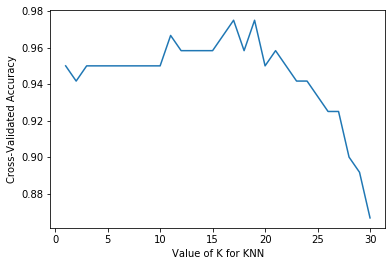

In [6]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Como siempre, observamos que la performance cambia para distintos valores del hiperparámetro. <br />
¿Cómo podemos hacer para sistematizar esta búsqueda y sumar más hiperparámetros a la exploración? 

## 2. Usando `GridSearch`


In [7]:
from sklearn.model_selection import GridSearchCV

Se define una lista de parámetros a testear.

In [8]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier()

In [9]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Instanciamos el método `GridSearchCV`

In [10]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Hacemos el fit

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

`GridSeachCV` devuelve un dict con mucha información. Desde el tiempo de fiteo de cada parámetro hasta los scores promedio (vía validación cruzada). También provee los score en cada train y test set de la K-Fold Cross Validation. 

In [12]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [13]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [14]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000400,0.001300,4.588842e-04,1,{'n_neighbors': 1},0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.950000,0.066667,11
1,0.000700,0.000458,0.001901,1.136735e-03,2,{'n_neighbors': 2},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,0.916667,1.000000,0.941667,0.053359,22
2,0.000799,0.000600,0.006001,1.305419e-02,3,{'n_neighbors': 3},0.833333,1.000000,0.916667,1.000000,0.916667,0.916667,0.916667,1.0,1.000000,1.000000,0.950000,0.055277,11
3,0.002801,0.003124,0.003899,2.070787e-03,4,{'n_neighbors': 4},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
4,0.001201,0.000402,0.003300,1.009268e-03,5,{'n_neighbors': 5},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
5,0.001201,0.000399,0.003799,2.087639e-03,6,{'n_neighbors': 6},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
6,0.001499,0.000806,0.005301,3.925708e-03,7,{'n_neighbors': 7},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
7,0.001199,0.000746,0.004202,1.720369e-03,8,{'n_neighbors': 8},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
8,0.000900,0.000538,0.004101,3.112604e-03,9,{'n_neighbors': 9},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11
9,0.001101,0.000299,0.003599,1.561861e-03,10,{'n_neighbors': 10},0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,11


Veamos el mejor modelo:

In [15]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                      weights='uniform'), 0.975, {'n_neighbors': 17})

### 2.1 Agregando otros parámetros para tunear

Vamos a agregar el parámetro binario de Peso del algoritmo knn que determina si algunos vecinos tendrán mayor ponderación que otros a la hora de clasificar. El valor distance indica que el peso es inversamente proporcional a la distancia

GridSearchCV exige que la grilla de parámetros a explorar venga en un diccionario con los nombres de los parámetros y la lista de los posibles valores. 

Noten que GridSearchCV tiene todos los métodos que la API de sklearn ofrece para modelos predictivos: fit, predict, predict_proba, etc.

In [16]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Entonces, ahora el tunning se realizará iterando y alternando `weights` y `k` (nro. de vecinos cercanos).

In [17]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Check:** 
    1. ¿Cómo se realizará el proceso de búsqueda? 
    2. ¿Cuántas veces tendrá que iterar el algoritmo?

Ajustamos los modelos

In [18]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [19]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000399,0.000489,0.001301,4.590623e-04,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.950000,0.066667,36
1,0.000300,0.000458,0.000800,4.000666e-04,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.950000,0.066667,36
2,0.000500,0.000500,0.001303,4.564010e-04,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,0.916667,1.000000,0.941667,0.053359,52
3,0.000500,0.000500,0.000600,4.899211e-04,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.950000,0.066667,36
4,0.000500,0.000500,0.001302,4.618638e-04,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.833333,1.000000,0.916667,1.000000,0.916667,0.916667,0.916667,1.0,1.000000,1.000000,0.950000,0.055277,36
5,0.000503,0.000503,0.000597,4.875406e-04,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.916667,1.0,1.000000,1.000000,0.966667,0.055277,3
6,0.000700,0.000458,0.001099,3.002144e-04,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,36
7,0.000400,0.000490,0.000700,4.582870e-04,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,1.000000,1.000000,0.958333,0.067185,16
8,0.000400,0.000490,0.001000,9.419797e-07,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,36
9,0.000500,0.000500,0.000800,3.999714e-04,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.916667,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,1.000000,1.000000,0.966667,0.055277,3


Escogemos el mejor modelo

In [20]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')
0.975
{'n_neighbors': 17, 'weights': 'uniform'}


## 3. Usamos los mejores parametros para correr las predicciones

In [21]:
X_test = scaler.transform(X_test)

In [22]:
grid.best_params_['n_neighbors'], grid.best_params_['weights'] 

(17, 'uniform')

In [23]:
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], weights=grid.best_params_['weights'] )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Podemos usar el atajo que tiene `GridSeachCV`: usando el método `predict` sobre objeto `grid`. 

In [25]:
y_pred_grid = grid.predict(X_test)

In [26]:
print (classification_report(y_test, y_pred_grid ), confusion_matrix(y_test, y_pred_grid ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## 4. Usando RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Ahora el tunning se realizará con combinaciones aleatorias de `weights` y `k` (nro. de vecinos cercanos).

In [29]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Check:** 
    1. ¿Cómo se realizará el proceso de búsqueda? 
    2. ¿Cuántas veces tendrá que iterar el algoritmo?

Ajustamos los modelos

In [30]:
random = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=10, scoring='accuracy')
random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=17,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'dist

In [31]:
pd.DataFrame(random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000500,0.000500,0.001399,4.907355e-04,uniform,9,"{'weights': 'uniform', 'n_neighbors': 9}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,14
1,0.000501,0.000501,0.000799,3.994538e-04,distance,23,"{'weights': 'distance', 'n_neighbors': 23}",1.000000,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.966667,0.055277,2
2,0.000200,0.000401,0.001400,4.906715e-04,uniform,1,"{'weights': 'uniform', 'n_neighbors': 1}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.833333,1.0,0.916667,1.000000,0.950000,0.066667,14
3,0.000400,0.000490,0.001800,6.006048e-04,uniform,4,"{'weights': 'uniform', 'n_neighbors': 4}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,14
4,0.000500,0.000500,0.001400,4.895321e-04,uniform,30,"{'weights': 'uniform', 'n_neighbors': 30}",0.833333,0.916667,0.750000,0.833333,0.916667,0.833333,0.833333,1.0,0.833333,0.916667,0.866667,0.066667,20
5,0.000600,0.000490,0.001199,4.004622e-04,uniform,18,"{'weights': 'uniform', 'n_neighbors': 18}",1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.833333,1.0,0.916667,1.000000,0.958333,0.055902,7
6,0.000500,0.000500,0.000801,4.003903e-04,distance,3,"{'weights': 'distance', 'n_neighbors': 3}",0.833333,1.000000,0.916667,1.000000,1.000000,1.000000,0.916667,1.0,1.000000,1.000000,0.966667,0.055277,2
7,0.000200,0.000399,0.001100,2.992129e-04,uniform,19,"{'weights': 'uniform', 'n_neighbors': 19}",1.000000,1.000000,0.916667,1.000000,1.000000,1.000000,0.916667,1.0,0.916667,1.000000,0.975000,0.038188,1
8,0.000400,0.000490,0.000600,4.897655e-04,distance,28,"{'weights': 'distance', 'n_neighbors': 28}",1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.833333,1.0,0.916667,1.000000,0.958333,0.055902,7
9,0.000400,0.000490,0.000998,5.742870e-06,uniform,5,"{'weights': 'uniform', 'n_neighbors': 5}",0.916667,1.000000,0.916667,1.000000,0.916667,0.916667,0.833333,1.0,1.000000,1.000000,0.950000,0.055277,14


Escogemos el mejor modelo

In [32]:
print (random.best_estimator_)
print(random.best_score_)
print(random.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')
0.975
{'weights': 'uniform', 'n_neighbors': 19}


Vemos que Random Search no obtuvo el mismo resultado que Grid Search, simplemente porque no probó tantas combinaciones y no encontró la óptima.

## 5. Usamos los mejores parametros (probados) para correr las predicciones

In [33]:
random.best_params_['n_neighbors'], grid.best_params_['weights'] 

(19, 'uniform')

In [34]:
knn = KNeighborsClassifier(n_neighbors=random.best_params_['n_neighbors'], weights=random.best_params_['weights'] )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Podemos usar el atajo que tiene `RandomizedSeachCV`: usando el método `predict` sobre objeto `random`. 

In [36]:
y_pred_random = random.predict(X_test)

In [37]:
print (classification_report(y_test, y_pred_random), confusion_matrix(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
